<a href="https://colab.research.google.com/github/Prags21/SARS-Analysis/blob/master/EDA_Sars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import *
import plotly.express as px
import folium

# sars dataset
sars_2003 = pd.read_csv("sars_2003_complete_dataset_clean.csv", parse_dates=['Date'])

# renaming columns
sars_2003.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# latest numbers
s_lat = sars_2003[sars_2003['Date'] == max(sars_2003['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# day index
sars_2003['day_index'] = (sars_2003['Date'] - min(sars_2003['Date'])).dt.days

# new dataset represting record of all countries on day basis
s_dbd = sars_2003.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# day index
s_dbd['day_index'] = sars_2003.groupby('Date')['day_index'].max().values

# no. of countries
temp = sars_2003[sars_2003['Cases']>0]
s_dbd['no_of_countries'] = temp.groupby('Date')['Country'].apply(len).values

#Death per 100 cases
if(sars_2003[sars_2003['Cases']>0]):
    sars_2003['death_rate']=(s_dbd['Deaths']/s_dbd['Cases'])*100
else:
    sars_2003['death_rate']=0



In [6]:
#deaths to infected :: Bargraph showing deaths/infected country on x
#fig = px.bar(s_dbd, x="Country", y="death_rate",color='death_rate', title='Deaths to infected')
#data = px.data.gapminder()
#fig.show()
sars_2003.()

,Date,Country,Cases,Deaths,Recovered,day_index,death_rate
2533,2003-07-11,Switzerland,1,0,1,116,NaN
2534,2003-07-11,Thailand,9,2,7,116,NaN
2535,2003-07-11,United Kingdom,4,0,4,116,NaN
2536,2003-07-11,United States,75,0,67,116,NaN
2537,2003-07-11,Viet Nam,63,5,58,116,NaN


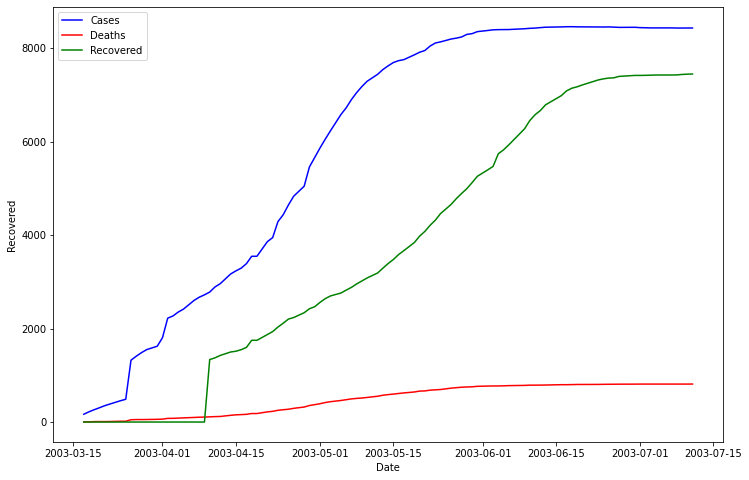

In [0]:

# Graph dipicting cases,deaths and recoveries over the time period in the dataset 
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=s_dbd["Date"], 
             y=s_dbd["Cases"],
             color='b',
             ax=ax)
sns.lineplot(x=s_dbd["Date"], 
             y=s_dbd["Deaths"], 
             color='r',
             ax=ax) 
sns.lineplot(x=s_dbd["Date"], 
             y=s_dbd["Recovered"], 
             color='g',
             ax=ax)    
ax.legend(['Cases', 'Deaths','Recovered'], facecolor='w')
plt.show()


In [0]:
#countrywise numbers of cases,deaths and recoveries  
fig = px.line(sars_2003, x="Date", y="Cases",color='Country',hover_name='Country', title='Number of cases')
fig.show()
fig_1 = px.line(sars_2003, x="Date", y="Deaths",color='Country',hover_name='Country', title='Number of Deaths')
fig_1.show()
fig_2 = px.line(sars_2003, x="Date", y="Recovered",color='Country',hover_name='Country', title='Number of Recoveries')
fig_2.show()


In [0]:
#map showing affected countries according to the intensity
fig = px.choropleth(s_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()